In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [15]:
lm = LinearRegression()
X = df[["highway-mpg"]]
Y = df["price"]
lm.fit(X, Y)
Yhat = lm.predict(X)
print(lm.intercept_)
print(lm.coef_)

38423.305858157386
[-821.73337832]


In [9]:
lm = LinearRegression()
Z = df[["horsepower","curb-weight","engine-size","highway-mpg"]]
lm.fit(Z,df["price"])
print(lm.intercept_)
print(lm.coef_)

-15806.624626329223
[53.49574423  4.70770099 81.53026382 36.05748882]


(0.0, 48175.9905408854)

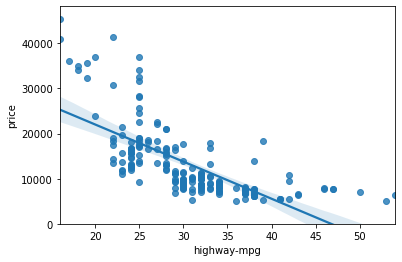

In [11]:
sns.regplot(x="highway-mpg",y="price",data=df)
plt.ylim(0,)

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

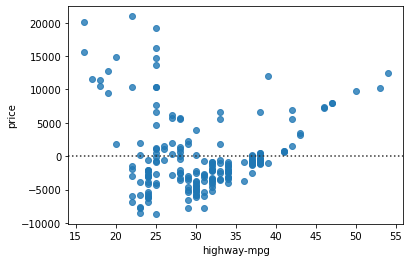

In [13]:
sns.residplot(df["highway-mpg"],df["price"])

C:\Users\lukeh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\lukeh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

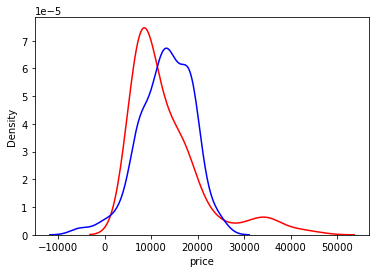

In [16]:
ax1 = sns.distplot(df["price"], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat,hist=False,color="b",label="Fitted Values",ax=ax1)

In [23]:
pr = PolynomialFeatures(degree=2,include_bias=False)
x_poly = pr.fit_transform(df[["horsepower","curb-weight"]])
x_poly

array([[1.1100000e+02, 2.5480000e+03, 1.2321000e+04, 2.8282800e+05,
        6.4923040e+06],
       [1.1100000e+02, 2.5480000e+03, 1.2321000e+04, 2.8282800e+05,
        6.4923040e+06],
       [1.5400000e+02, 2.8230000e+03, 2.3716000e+04, 4.3474200e+05,
        7.9693290e+06],
       ...,
       [1.3400000e+02, 3.0120000e+03, 1.7956000e+04, 4.0360800e+05,
        9.0721440e+06],
       [1.0600000e+02, 3.2170000e+03, 1.1236000e+04, 3.4100200e+05,
        1.0349089e+07],
       [1.1400000e+02, 3.0620000e+03, 1.2996000e+04, 3.4906800e+05,
        9.3758440e+06]])

In [25]:
SCALE = StandardScaler()
SCALE.fit(df[["horsepower","highway-mpg"]])
x_scale=SCALE.transform(df[["horsepower","highway-mpg"]])

In [26]:
x_scale

array([[ 0.20375448, -0.54228772],
       [ 0.20375448, -0.54228772],
       [ 1.3574159 , -0.689386  ],
       [-0.03770954, -0.10099285],
       [ 0.31107182, -1.27777915],
       [ 0.17692514, -0.83648429],
       [ 0.17692514, -0.83648429],
       [ 0.17692514, -0.83648429],
       [ 0.9818052 , -1.57197573],
       [-0.06453888, -0.24809114],
       [-0.06453888, -0.24809114],
       [ 0.47204783, -0.39518943],
       [ 0.47204783, -0.39518943],
       [ 0.47204783, -0.83648429],
       [ 2.10863729, -1.27777915],
       [ 2.10863729, -1.27777915],
       [ 2.10863729, -1.57197573],
       [-1.48649365,  3.28226775],
       [-0.89624827,  1.81128488],
       [-0.89624827,  1.81128488],
       [-0.94990694,  1.51708831],
       [-0.94990694,  1.07579344],
       [-0.03770954, -0.10099285],
       [-0.94990694,  1.07579344],
       [-0.94990694,  1.07579344],
       [-0.94990694,  1.07579344],
       [-0.03770954, -0.10099285],
       [-0.41332024, -0.10099285],
       [ 1.11595188,

In [29]:
Input = [("scale",StandardScaler()),("polynomial",PolynomialFeatures(degree=2)),("mode",LinearRegression())]
pipe = Pipeline(Input)

In [ ]:
pipe.fit(df[["horsepower","curb-weight","engine-size","highway-mpg"]])
yhat=pipe.predict(df[["horsepower","curb-weight","engine-size","highway-mpg"]])


In [35]:
mean_squared_error(df["price"],Y_predict_simple_fit)

NameError: name 'Y_predict_simple_fit' is not defined

In [37]:
X = df[["highway-mpg"]]
Y = df["price"]
lm.fit(X,Y)
lm.score(X,Y)

0.4965911884339175

In [41]:
model1 = lm.fit(df[["highway-mpg"]],df["price"])

In [43]:
model1.predict(np.array(30.0).reshape(-1,1))

array([13771.3045085])

In [44]:
new_input = np.arange(1,101,1).reshape(-1,1)

In [45]:
new_input

array([[  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
       [ 71],
      